## The curse of Dimensionality

Humans are bound by their perception of a maximum of three dimensions. We can’t comprehend shapes/graphs beyond three dimensions. Often, data scientists get datasets which have thousands of features. They give birth to two kinds of problems:

* **Increase in computation time:** Majority of the machine learning algorithms they rely on the calculation of distance for model building and as the number of dimensions increases it becomes more and more computation-intensive to create a model out of it. For example, if we have to calculate the distance between two points in just one dimension, like two points on the number line, we’ll just subtract the coordinate of one point from another and then take the magnitude:

Distance= $ x_1-x_2 $

What if we need to calculate the distance between two points in two dimensions?

The same formula translates to:
Distance= $ \sqrt {(x_1-x_2)^2+(y_1-y_2)^2} $

What if we need to calculate the distance between two points in three dimensions?

The same formula translates to:
Distance= $ \sqrt {(x_1-x_2)^2+(y_1-y_2)^2+(z_1-z_2)^2}$

And for N-dimensions, the formula becomes:
Distance=$ \sqrt {(a_1-a_2)^2+(b_1-b_2)^2+(c_1-c_2)^2+…+(n_1-n_2)^2} $

This is the effort of calculating the distance between two points. Just imagine the number of calculations involved for all the data points involved.

One more point to consider is that as the number of dimension increases, points are going far away from each other. This means that any new point that comes when we are testing the model is going to be farther away from our training points. This leads to a less reliable model, and it makes our model overfitted to the training data.



* **Hard (or almost impossible) to visualise the relationship between features:** As stated above, humans can not comprehend things beyond three dimensions. So, if we have an n-dimensional dataset, the only solution left to us is to create either a 2-D or 3-D graph out of it. Let’s say for simplicity, we are creating 2-D graphs. Suppose we have 1000 features in the dataset. That results in a  total (1000*999)/2= 499500 combinations possible for creating the 2-D graph.

Is it humanly possible to analyse all those graphs to understand the relationship between the variables?

**The questions that we need to ask at this point are:**

* Are all the features really contributing to decision making?
* Is there a way to come to the same conclusion using a lesser number of features?
* Is there a way to combine features to create a new feature and drop the old ones?
* Is there a way to remodel features in a way to make them visually comprehensible?

The answer to all the above questions is- _Dimensionality Reduction technique._



## What is a Dimensionality Reduction Technique?

Dimensionality reduction is a feature selection technique using which we reduce the number of features to be used for making a model without losing a significant amount of information compared to the original dataset. In other words, a dimensionality reduction technique projects a data of higher dimension to a lower-dimensional subspace.

**When to use Dimensionality Reduction?**
Dimensionality reduction shall be used before feeding the data to a machine learning algorithm to achieve the following:

* It reduces the size of the space in which the distances are calculated, thereby improving machine learning algorithm performance.
* It reduces the degrees of freedom for our dataset avoiding chances of overfitting
* Reducing the dimensionality using dimensionality reduction techniques can simplify the dataset facilitating a better description, visualisation, and insight.


## Principal Component Analysis:
The principal component analysis is an unsupervised machine learning algorithm used for feature selection using dimensionality reduction techniques. As the name suggests, it finds out the principal components from the data. PCA transforms and fits the data from a higher-dimensional space to a new, lower-dimensional subspace This results into an entirely new coordinate system of the points where the first axis corresponds to the first principal component that explains the most variance in the data.

**What are the principal components?**
Principal components are the derived features which explain the maximum variance in the data. The first principal component explains the most variance, the 2nd a bit less and so on. Each of the new dimensions found using PCA is a linear combination of the old features.

Let's take the following example where the data is distributed like the diagram on the left:
<img src="PCA_intro1.PNG" width="500">




In the diagram above, we are considering 3 orthogonal(_C3  is in the third dimension_) axes to show the distribution of data. If you notice the diagram on the right, the first two axes **C1** and **C2** successfully explain the maximum variation in the data whereas the axes **C3** only consists of a fewer number of points. Hence, while considering the principal components C1 and C2 will be our choices.

## Mathematics Behind PCA
We are going to discuss PCA using a method called Singular Value Decomposition (SVD) which factorises the dataset matrix in such a way that it becomes a  product of the multiplication of three individual matrices:

X(original Data)= $ U* \Sigma* V^T$


Where V is the matrix that contains the principal components.

U is the Orthogonal Matrix.

Sigma is the Diagonal Matrix


**Pre-requisite:** PCA assumes that the mean of all the individual columns is zero and the standard deviation is 1. So, before applying PCA, the data should be pre-processed appropriately.

Let’s take a simple example to understand it:

Let’s suppose we have the following dataset:

<img src="table.PNG" width="300">


#### Steps to Calculate PCA
* Let’s plot this on the XY plane and calculate the average of the magnitude of all the points. Blue ones are the actual points and the yellow one is the average point.

<img src="points.PNG" width="300">

* Move the points so that the average point is on the origin. This is called a parallel translation. Although the coordinates of the points have changed, the corresponding distances among them remain the same.

<img src="move_average.PNG" width="300">

* Create the best fit line for the new data points. We first start with a random line(blue one), and then try to find the best fit line(the green one) so that the distance from individual data points is minimum and consequently the distance from origin is maximum. This best fit line is called Principal component1 or PC1.

<img src="best_fit.PNG" width="300">

* PC2 is a line perpendicular to the PC1.
* Then the axes PC1 and PC2 are rotated in a way that PC1 becomes the horizontal axis.
<img src="axis_rotate.PNG" width="300">
* Then based on the sample points the new points are projected using PC1 and PC2. Thus we get the derived features.
<img src="projected_points.PNG" width="300">

But the question is: if we talk about n dimensions, there are n-1 perpendicular lines possible on PC1. **How to select a line as PC2?**

And the next question is: **what is the optimum number of Principal components needed?**


#### Explained Variance Ratio

All of the above questions are answered using the *explained variance ratio*. It represents the amount of variance each principal component is able to explain.

For example, suppose if the square of distances of all the points from the origin that lie on PC1 is 50 and for the points on PC2 it’s 5.

EVR of PC1=$\frac{Distance of PC1 points}{( Distance of PC1 points+ Distance of PC2 points)}=\frac{50}{55}=0.91 $

EVR of PC2=$\frac{Distance of PC2 points}{( Distance of PC1 points+ Distance of PC2 points)}=\frac{5}{55}=0.09 $


Thus PC1 explains 91% of the variance of data. Whereas, PC2 only explains 9% of the variance. Hence we can use only PC1 as the input for our model as it explains the majority of the variance.

In a real-life scenario, this problem is solved using the **Scree Plots**


## Scree Plots:
Scree plots are the graphs that convey how much variance is explained by corresponding Principal components.
<img src="scree.PNG" width="500">

As shown in the given diagram, around 75 principal components explain approximately 90 % of the variance. Hence, 75 can be a good choice based on the scenario


### Eigen-decomposition of $\Sigma$

According to [Wikipedia article on PCA](https://en.m.wikipedia.org/wiki/Principal_component_analysis), *"PCA can be done by eigenvalue decomposition of a data covariance (or correlation) matrix or singular value decomposition of a data matrix."* The second approach has already been discussed above. Let's discuss the first approach now.

$\Sigma$ is a real, symmetric matrix; thus, it has

1) real eigenvalues, and

2) orthogonal eigenvectors.

Definition:

An **eigenvector v** of a linear transformation **T** is a nonzero vector that, when **T** is applied to it, does not change direction. Applying __T__ to the eigenvector only scales the eigenvector by the scalar value λ, called an **eigenvalue**. This condition can be written as the equation

$$
{\displaystyle T(\mathbf {v} )=\lambda \mathbf {v} ,}
$$

Recall from your Linear Algebra class that the following should hold:

\begin{eqnarray}
\Sigma x_0 &=& \lambda_0 x_0 \nonumber \\
\Sigma x_1 &=& \lambda_1 x_1 \nonumber \\
\end{eqnarray}

### Summary of Eigen-decomposition Approach
1. Normalize columns of $A$ so that each feature has a mean of zero
1. Compute sample covariance matrix $\Sigma = {A^TA}/{(m-1)}$
1. Perform eigen-decomposition of $\Sigma$ using `np.linalg.eig(Sigma)`
1. Compress by ordering $k$ evectors according to largest e-values and compute $AX_k$
1. Reconstruct from the compressed version by computing $A X_k X_k^T$


All the above steps can be summarized with the following gif.
[Wicked animated GIF which illustrates PCA](http://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues)

Magically, eigen-decomposition (or PCA) finds the line where
1. the spread of values along the black line is **maximal**
2. the projection error (sum of red lines) is **minimal**

<img src="https://i.stack.imgur.com/Q7HIP.gif">

## Python Implementation

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
# we are using the free glass datset.
# The objective is to tell the type of glass based on amount of other elements present.
data = pd.read_csv('/content/glass_data.csv')

In [32]:
data.head()

,id,ri,na,mg,al,si,k,ca,ba,fe,type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [33]:
data.isna().sum()

id      0
ri      0
na      0
mg      0
al      0
si      0
k       0
ca      0
ba      0
fe      0
type    0
dtype: int64

In [34]:
data=data.drop(labels=['id','type'], axis=1)

In [ ]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


We’ll go ahead and standardise this data as all the data is on a different scale.


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data)


In [ ]:
df=pd.DataFrame(data=scaled_data, columns= data.columns)

In [ ]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02
mean,-2.877449e-14,2.179980e-15,-2.801497e-16,-3.434428e-16,9.966067e-16,7.470660e-17,-3.137418e-16,-1.763906e-16,-6.121791e-17
std,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00
min,-2.381516e+00,-3.286943e+00,-1.865511e+00,-2.318616e+00,-3.676472e+00,-7.639186e-01,-2.484084e+00,-3.528768e-01,-5.864509e-01
25%,-6.082728e-01,-6.141580e-01,-3.957744e-01,-5.117560e-01,-4.800288e-01,-5.756501e-01,-5.049657e-01,-3.528768e-01,-5.864509e-01
50%,-2.262293e-01,-1.323817e-01,5.527787e-01,-1.704602e-01,1.799655e-01,8.905322e-02,-2.514132e-01,-3.528768e-01,-5.864509e-01
75%,2.614331e-01,5.120326e-01,6.361680e-01,3.715977e-01,5.649621e-01,1.735820e-01,1.518057e-01,-3.528768e-01,4.422417e-01
max,5.137232e+00,4.875637e+00,1.254639e+00,4.125851e+00,3.570524e+00,8.780145e+00,5.094318e+00,5.997210e+00,4.659881e+00


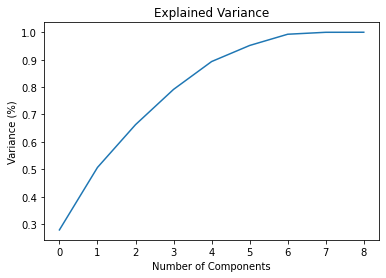

In [ ]:
from sklearn.decomposition import PCA
pca = PCA() # default
principalComponents = pca.fit_transform(df)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()


From the diagram above, it can be seen that 4 principal components explain almost 90% of the variance in data and 5 principal components explain around 95% of the variance in data.

So, instead of giving all the columns as input, we’d only feed these 4 principal components of the data to the machine learning algorithm and we’d obtain a similar result.


In [ ]:
pca = PCA(n_components=4)
new_data = pca.fit_transform(df)
# This will be the new data fed to the algorithm.
principal_Df = pd.DataFrame(data = new_data
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4'])

In [ ]:
principal_Df.head()

,principal component 1,principal component 2,principal component 3,principal component 4
0,1.151140,-0.529488,-0.372096,1.728901
1,-0.574137,-0.759788,-0.556708,0.760232
2,-0.940160,-0.929836,-0.554907,0.206254
3,-0.142083,-0.961677,-0.117125,0.415724
4,-0.351092,-1.091249,-0.485079,0.069102


Here, we see that earlier we had 9 columns in the data earlier. Now with the help of Scree plot and PCA, we have reduced the number of features to be used for model building to 4. This is the advantage of PCA. _It drastically reduces the number of features, thereby considerably reducing the training time for the model._

### Visualizing the Principal components

As humans can only perceive 3dimensions, we’ll take a dataset with less than 4 dimensions.


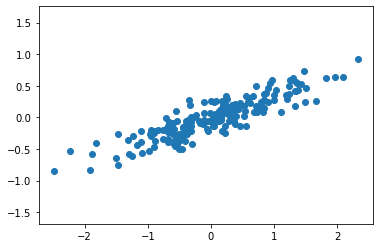

In [ ]:
np.random.seed(1)
X = np.dot(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T
plt.plot(X[:, 0], X[:, 1], 'o')
plt.axis('equal');

PCA seeks to find the **Principal Axes** in the data, and explain how vital those axes are in describing the data distribution

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_)
print(pca.components_)

[0.7625315 0.0184779]
[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


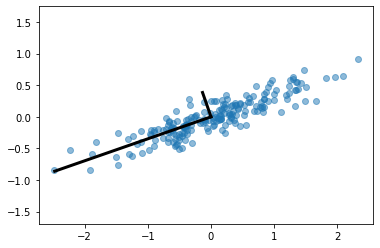

In [ ]:
#To see what these numbers mean, let's view them as vectors plotted on top of the data:

plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.5)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)
plt.axis('equal');

Notice that one vector is longer than the other. In a sense, this tells us that that direction in the data is somehow more "important" than the other direction.
The explained variance quantifies this measure of "importance" in a direction.

Another way to think of it is that the second principal component could be **completely ignored** without much loss of information! Let's see what our data look like if we only keep 95% of the variance


In [ ]:
clf = PCA(0.95) # keep 95% of variance
X_trans = clf.fit_transform(X)
print(X.shape)
print(X_trans.shape)

(200, 2)
(200, 1)


By specifying that we want to throw away 5% of the variance, the data is now compressed by a factor of 50%! Let's see what the data look like after this compression:

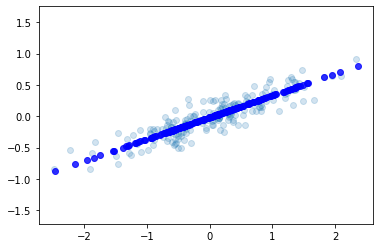

In [ ]:
X_new = clf.inverse_transform(X_trans)
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.2)
plt.plot(X_new[:, 0], X_new[:, 1], 'ob', alpha=0.8)
plt.axis('equal');

The lighter points are the original data, while the dark points are the projected version on the principal component axis.  We see that after truncating 5% of the variance of this dataset and then reprojecting it, the "most important" features of the data are maintained, and we've compressed the data by 50%!

This is the sense in which "dimensionality reduction" works: if you can approximate a data set in a lower dimension, you can often have an easier time visualizing it or fitting complicated models to the data.


**Pros of PCA:**

- Correlated features are removed.
- Model training time is reduced.
- Overfitting is reduced.
- Helps in better visualizations
- Ability to handle noise

**Cons of PCA**
- The resultant principal components are less interpretable than the original data
- Can lead to information loss if the explained variance threshold is not considered appropriately.


### Conclusion
From all the explanations above, we can conclude that PCA is a very powerful technique for reducing the dimensions of the data, projecting the data from a higher dimension to a lower dimension, helps in data visualization, helps in data compression and most of all increases the model training speed drastically by decreasing the number of variables involved in computation.